<a href="https://colab.research.google.com/github/toyash/MachineLearning/blob/master/TensorflowServingExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow-gpu==2.0.0.alpha0


     |████████████████████████████████| 332.1MB 24kB/s 
     |████████████████████████████████| 3.0MB 48.0MB/s 
     |████████████████████████████████| 419kB 65.1MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [0]:
import tensorflow as tf
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile
import matplotlib.pyplot as plt
import os
import tempfile


In [9]:
(X_train,y_train),(X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Data normalization

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255


In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [0]:
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
W_grid = 4
L_grid = 4

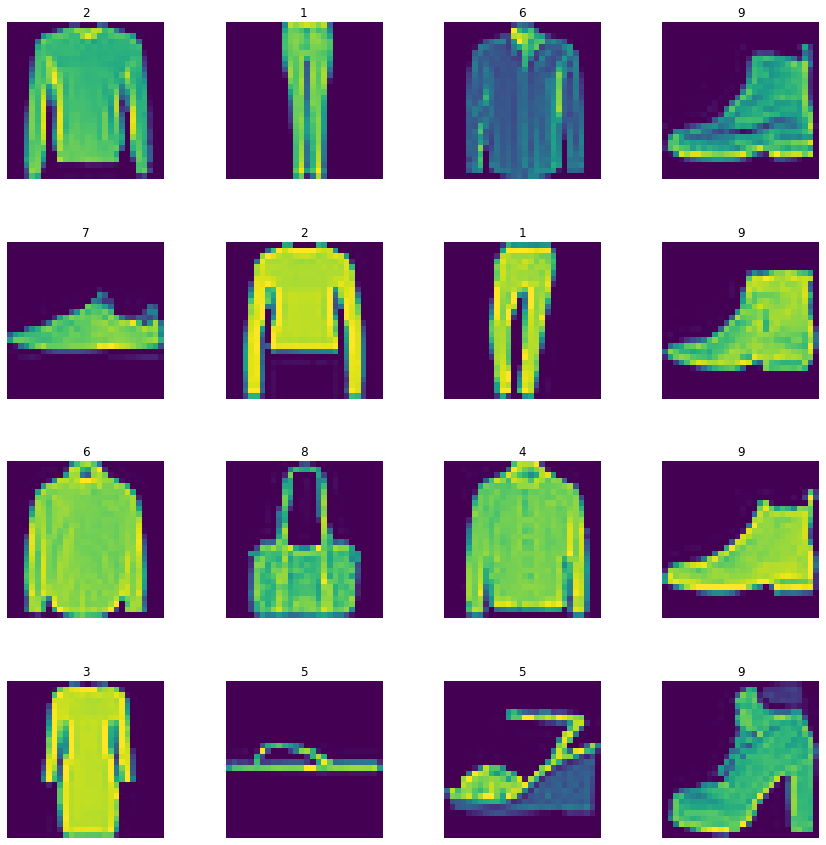

In [20]:
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training) # pick a random number
  axes[i].imshow(X_train[index].reshape(28,28))
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [21]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(64, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                495680    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 5

In [0]:
epochs = 5

In [0]:
cnn.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn.fit(X_train, y_train, epochs=epochs)

test_loss, test_acc = cnn.evaluate(X_test, y_test)
print('\nTest accuracy: {}'.format(test_acc))

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 185us/sample - loss: 0.3986 - acc: 0.8567
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2616 - acc: 0.9054
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2139 - acc: 0.9211
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1783 - acc: 0.9338
Epoch 5/5
10000/10000 [==============================] - 1s 52us/sample - loss: 0.2415 - acc: 0.9150

Test accuracy: 0.9150000214576721


In [0]:
# Let's obtain a temporary storage directory
MODEL_DIR = tempfile.gettempdir()

## Save the model

In [40]:
MODEL_DIR

'/tmp'

In [0]:
version=1

In [0]:
export_path = os.path.join(MODEL_DIR, str(version))

In [33]:
export_path 

'/tmp/1'

In [34]:
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.simple_save(
    tf.keras.backend.get_session(),
    export_path,
    inputs={'input_image': cnn.input},
    outputs={t.name:t for t in cnn.outputs})

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/1/saved_model.pb


In [35]:
!ls -l {export_path}

total 124
-rw-r--r-- 1 root root 119438 Dec 25 10:08 saved_model.pb
drwxr-xr-x 2 root root   4096 Dec 25 10:08 variables


In [36]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_image'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1/Softmax:0'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: dense_1/Softmax:0
  Method name is: tensorflow/serving/predict


In [37]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  10624      0 --:--:-- --:--:-- --:--:-- 10586
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:7 http://ppa.launchpad.net/graphics-dr

In [38]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 140 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.0.0 [140 MB]
Fetched 140 MB in 2s (81.0 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.0.0_all.deb ...
Unpacking tensorflow-model-server (2.0.0) ...
Setting up tensorflow-model-server (2.0.0) ...


In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [41]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [42]:
!tail server.log

2019-12-25 10:11:35.712138: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-12-25 10:11:35.713599: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-12-25 10:11:35.725389: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-12-25 10:11:35.746938: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 36517 microseconds.
2019-12-25 10:11:35.747433: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2019-12-25 10:11:35.747508: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2019-12-25 10:11:35.748407: I tensorflow_serving/mode

In [0]:
def show(idx, title):
  plt.figure()
  plt.imshow(X_test[idx].reshape(28,28))
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

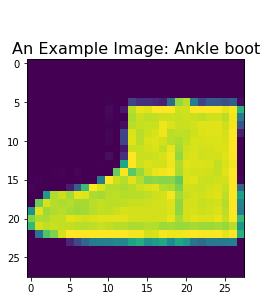

In [44]:
rando = random.randint(0,len(X_test)-1)
show(rando, 'An Example Image: {}'.format(class_names[y_test[rando]]))

In [45]:
# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


In [0]:
!pip install -q requests


In [0]:

import requests


In [0]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']


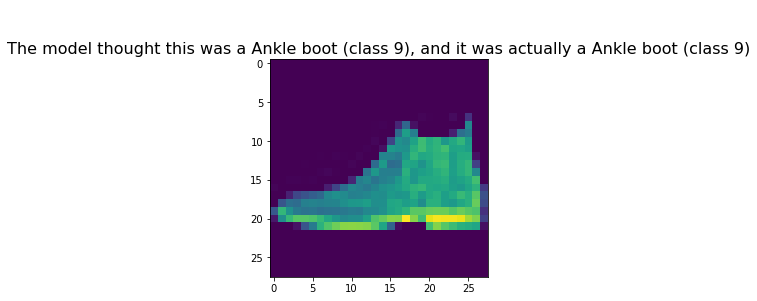

In [49]:

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], y_test[0], class_names[np.argmax(predictions[0])], y_test[0]))

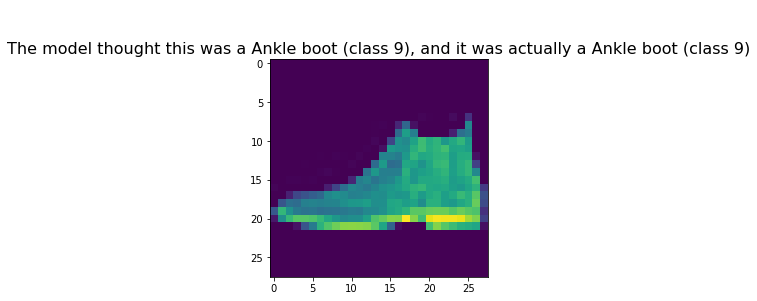

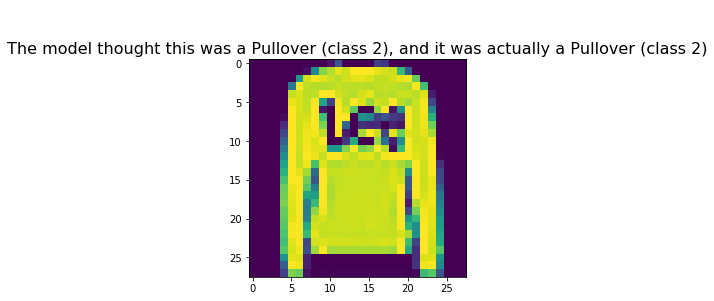

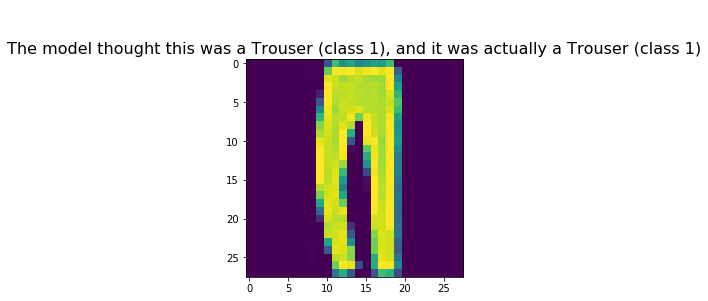

In [50]:
for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], y_test[i], class_names[np.argmax(predictions[i])], y_test[i]))